In [1]:
!pip install networkx matplotlib seaborn


[notice] A new release of pip is available: 23.2.1 -> 26.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import statistics
import random
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import collections

In [3]:
data_path = "data/zachary.graphml"
karate = nx.read_graphml(data_path)
print(type(karate))
print(karate.number_of_nodes())
print(karate.number_of_edges())

<class 'networkx.classes.graph.Graph'>
34
78


In [4]:
data_path = "data/juegoDtronos.graphml"
got = nx.read_graphml(data_path)
print(type(got))
print(got.number_of_nodes())
print(got.number_of_edges())

<class 'networkx.classes.digraph.DiGraph'>
796
5646


In [5]:
data_path = "data/egypt_retweets.gml"
egipto = nx.read_gml(data_path)
print(type(egipto))
print(egipto.number_of_nodes())
print(egipto.number_of_edges())

<class 'networkx.classes.multigraph.MultiGraph'>
25178
32785


In [6]:
# Convertir en grafo simple
egipto = nx.Graph(egipto)
print(type(egipto))
print(egipto.number_of_nodes())
print(egipto.number_of_edges())


<class 'networkx.classes.graph.Graph'>
25178
32785


In [7]:
# convierto a no dirigido
got = got.to_undirected()
type(got)

networkx.classes.graph.Graph

In [8]:
print(got.nodes)
print(got.edges)

['Addam-Marbrand', 'Brynden-Tully', 'Cersei-Lannister', 'Gyles-Rosby', 'Jaime-Lannister', 'Jalabhar-Xho', 'Joffrey-Baratheon', 'Kevan-Lannister', 'Lyle-Crakehall', 'Oberyn-Martell', 'Tyrion-Lannister', 'Tywin-Lannister', 'Varys', 'Catelyn-Stark', 'Robb-Stark', 'Walder-Frey', 'Arya-Stark', 'Theon-Greyjoy', 'Rickard-Karstark', 'Edmure-Tully', 'Lysa-Arryn', 'Daven-Lannister', 'Edwyn-Frey', 'Emmon-Frey', 'Hoster-Tully', 'Nestor-Royce', 'Ryman-Frey', 'Daenerys-Targaryen', 'Eddard-Stark', 'Stannis-Baratheon', 'Elia-Martell', 'Rhaegar-Targaryen', 'Janos-Slynt', 'Jon-Snow', 'Robert-Baratheon', 'Aerys-II-Targaryen', 'Barristan-Selmy', 'Brienne-of-Tarth', 'Jon-Arryn', 'Alayaya', 'Bronn', 'Bran-Stark', 'Mace-Tyrell', 'Margaery-Tyrell', 'Renly-Baratheon', 'Osney-Kettleblack', 'Sansa-Stark', 'Jory-Cassel', 'Lancel-Lannister', 'Amory-Lorch', 'Chiswyck', 'Dunsen', 'Gregor-Clegane', 'Ilyn-Payne', 'Meryn-Trant', 'Polliver', 'Rafford', 'Sandor-Clegane', 'Tickler', 'Myrcella-Baratheon', 'Petyr-Baelish', 

In [9]:
print(got.number_of_nodes())
print(got.number_of_edges())

796
2823


In [10]:
print(got.nodes['Cersei-Lannister'])
print(got.edges['Addam-Marbrand', 'Cersei-Lannister'])

{'label': 'Cersei-Lannister', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 725.1648, 'y': -1192.3834}
{'weight': 3.0, 'id': '31'}


In [11]:
# el tipo de nodes (NodeView) es parecido a un diccionario
for n, d in got.nodes(data=True):
    print(n)
    print(d)

Addam-Marbrand
{'label': 'Addam-Marbrand', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 548.192, 'y': -1542.1415}
Brynden-Tully
{'label': 'Brynden-Tully', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': -867.2599, 'y': -1118.1295}
Cersei-Lannister
{'label': 'Cersei-Lannister', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 725.1648, 'y': -1192.3834}
Gyles-Rosby
{'label': 'Gyles-Rosby', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 1218.8805, 'y': -862.3968}
Jaime-Lannister
{'label': 'Jaime-Lannister', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': -144.7509, 'y': -1121.8662}
Jalabhar-Xho
{'label': 'Jalabhar-Xho', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 1844.3105, 'y': -2152.5952}
Joffrey-Baratheon
{'label': 'Joffrey-Baratheon', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 339.98248, 'y': -498.40387}
Kevan-Lannister
{'label': 'Kevan-Lannister', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 119.34762, 'y': -637.41815}
Lyle-Crakehall
{'label': 'Lyle-Crakehall', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': -81.

In [12]:
# lo mismo es aplicable a los arcos
list(got.edges(data=True))[0:5]


[('Addam-Marbrand', 'Brynden-Tully', {'weight': 3.0, 'id': '12'}),
 ('Addam-Marbrand', 'Cersei-Lannister', {'weight': 3.0, 'id': '31'}),
 ('Addam-Marbrand', 'Gyles-Rosby', {'weight': 3.0, 'id': '128'}),
 ('Addam-Marbrand', 'Jaime-Lannister', {'weight': 14.0, 'id': '146'}),
 ('Addam-Marbrand', 'Jalabhar-Xho', {'weight': 3.0, 'id': '247'})]

In [13]:
for n1, n2, d in got.edges(data=True):
    print(n1)
    print(n2)
    print(d)

Addam-Marbrand
Brynden-Tully
{'weight': 3.0, 'id': '12'}
Addam-Marbrand
Cersei-Lannister
{'weight': 3.0, 'id': '31'}
Addam-Marbrand
Gyles-Rosby
{'weight': 3.0, 'id': '128'}
Addam-Marbrand
Jaime-Lannister
{'weight': 14.0, 'id': '146'}
Addam-Marbrand
Jalabhar-Xho
{'weight': 3.0, 'id': '247'}
Addam-Marbrand
Joffrey-Baratheon
{'weight': 3.0, 'id': '252'}
Addam-Marbrand
Kevan-Lannister
{'weight': 3.0, 'id': '321'}
Addam-Marbrand
Lyle-Crakehall
{'weight': 4.0, 'id': '338'}
Addam-Marbrand
Oberyn-Martell
{'weight': 3.0, 'id': '343'}
Addam-Marbrand
Tyrion-Lannister
{'weight': 7.0, 'id': '363'}
Addam-Marbrand
Tywin-Lannister
{'weight': 6.0, 'id': '485'}
Addam-Marbrand
Varys
{'weight': 4.0, 'id': '533'}
Brynden-Tully
Jaime-Lannister
{'weight': 29.0, 'id': '147'}
Brynden-Tully
Lyle-Crakehall
{'weight': 4.0, 'id': '339'}
Brynden-Tully
Tyrion-Lannister
{'weight': 4.0, 'id': '364'}
Brynden-Tully
Tywin-Lannister
{'weight': 10.0, 'id': '486'}
Brynden-Tully
Catelyn-Stark
{'weight': 29.0, 'id': '571'}
Br

## Ejercicio:
¿Cuál es la pareja de personajes que interactúa más veces durante el primer libro?

In [14]:
got.edges(data=True)

EdgeDataView([('Addam-Marbrand', 'Brynden-Tully', {'weight': 3.0, 'id': '12'}), ('Addam-Marbrand', 'Cersei-Lannister', {'weight': 3.0, 'id': '31'}), ('Addam-Marbrand', 'Gyles-Rosby', {'weight': 3.0, 'id': '128'}), ('Addam-Marbrand', 'Jaime-Lannister', {'weight': 14.0, 'id': '146'}), ('Addam-Marbrand', 'Jalabhar-Xho', {'weight': 3.0, 'id': '247'}), ('Addam-Marbrand', 'Joffrey-Baratheon', {'weight': 3.0, 'id': '252'}), ('Addam-Marbrand', 'Kevan-Lannister', {'weight': 3.0, 'id': '321'}), ('Addam-Marbrand', 'Lyle-Crakehall', {'weight': 4.0, 'id': '338'}), ('Addam-Marbrand', 'Oberyn-Martell', {'weight': 3.0, 'id': '343'}), ('Addam-Marbrand', 'Tyrion-Lannister', {'weight': 7.0, 'id': '363'}), ('Addam-Marbrand', 'Tywin-Lannister', {'weight': 6.0, 'id': '485'}), ('Addam-Marbrand', 'Varys', {'weight': 4.0, 'id': '533'}), ('Brynden-Tully', 'Jaime-Lannister', {'weight': 29.0, 'id': '147'}), ('Brynden-Tully', 'Lyle-Crakehall', {'weight': 4.0, 'id': '339'}), ('Brynden-Tully', 'Tyrion-Lannister', {'

# Visualizacion

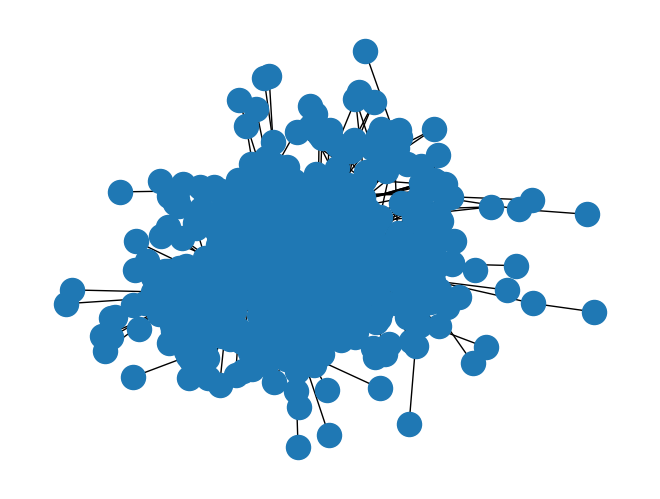

In [15]:
nx.draw(got)

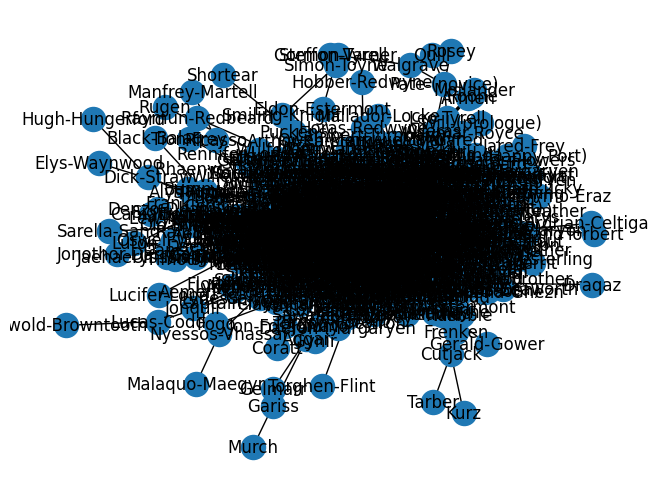

In [16]:
nx.draw(got, with_labels=True)

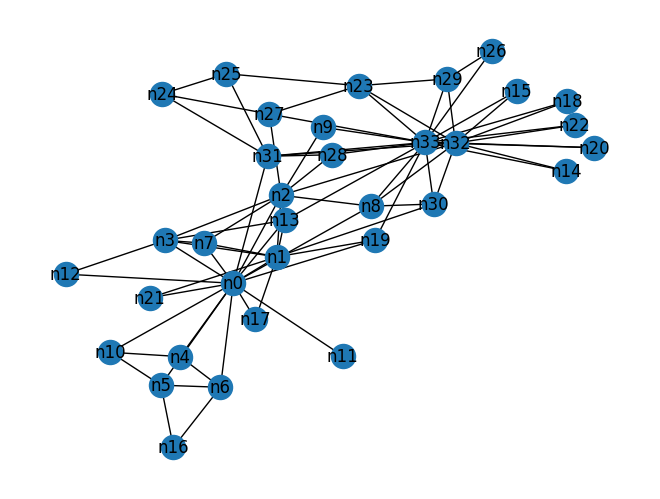

In [17]:
data_path = "data/zachary.graphml"
karate = nx.read_graphml(data_path)
nx.draw(karate,with_labels=True)

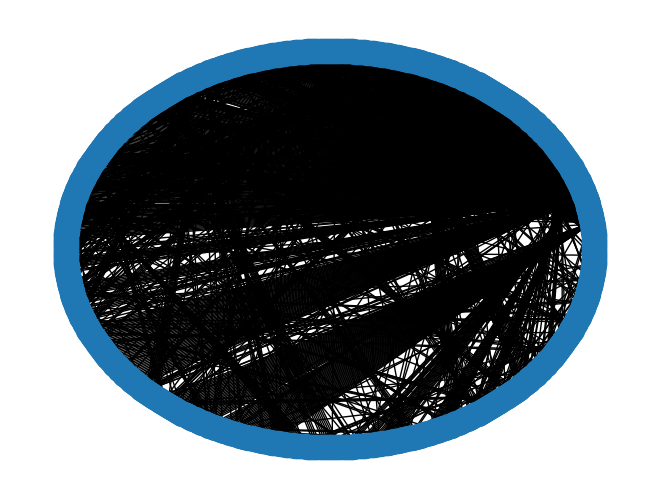

In [18]:
nx.draw_circular(got)

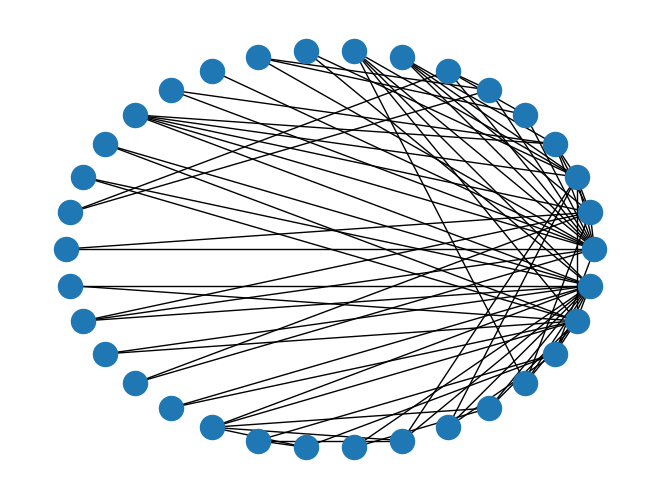

In [19]:
nx.draw_circular(karate)

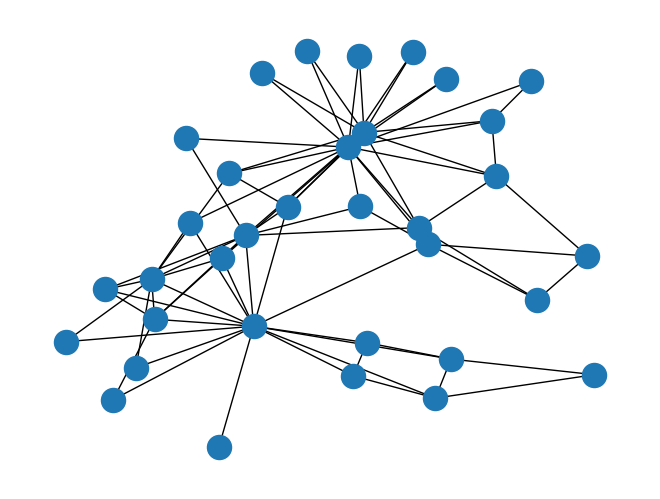

In [20]:
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_spring.html
pos = nx.spring_layout(karate)
nx.draw(karate, pos=pos)

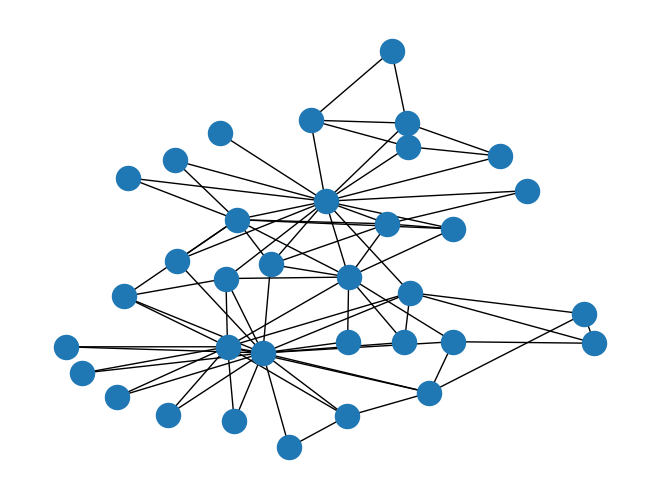

In [21]:
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_kamada_kawai.html#
pos = nx.kamada_kawai_layout(karate)
nx.draw(karate, pos=pos)

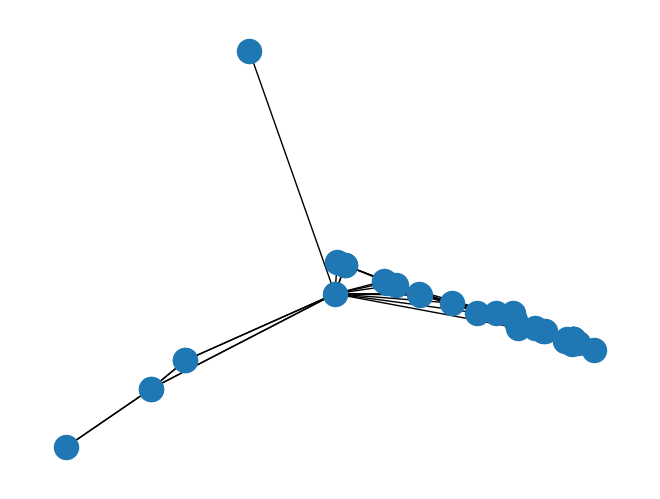

In [22]:
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_spectral.html
pos = nx.spectral_layout(karate)
nx.draw(karate, pos=pos)


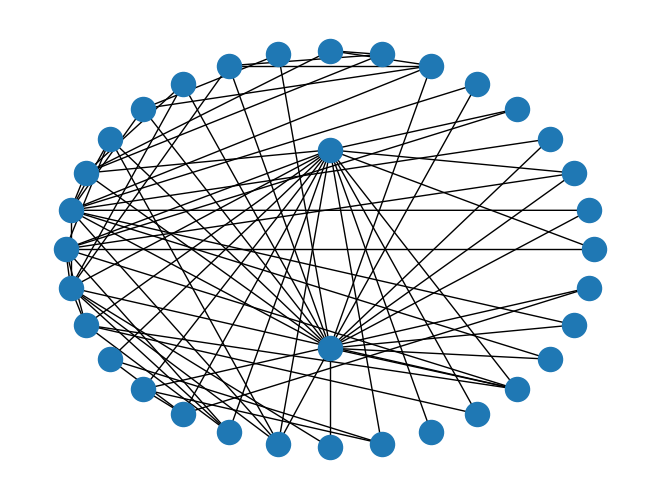

In [23]:
# separa en capas (por ahora, sólo 2 capas)
principales = ['n0', 'n33']
otros = [n for n in karate.nodes() if n not in principales]
shells = [principales, otros]

pos = nx.shell_layout(karate, shells)
nx.draw(karate, pos=pos)


In [24]:
# solo se hace la primera vez
grafo = karate
pos = nx.spring_layout(grafo)

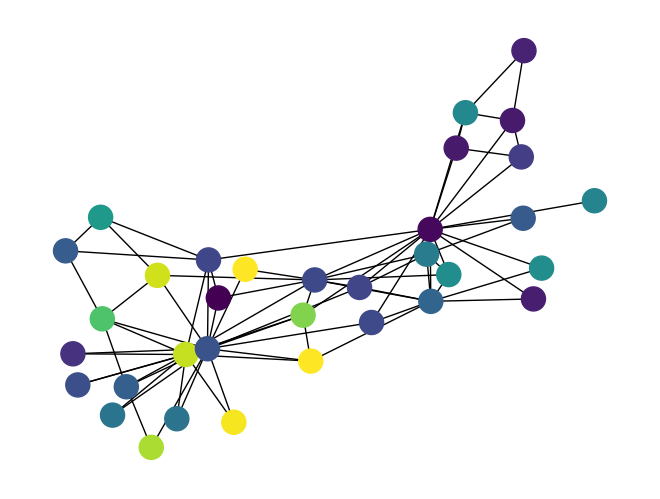

In [25]:
import random

colors = [random.randrange(0,255,1) for n in grafo.nodes]
nx.draw(grafo, pos=pos,node_color=colors)


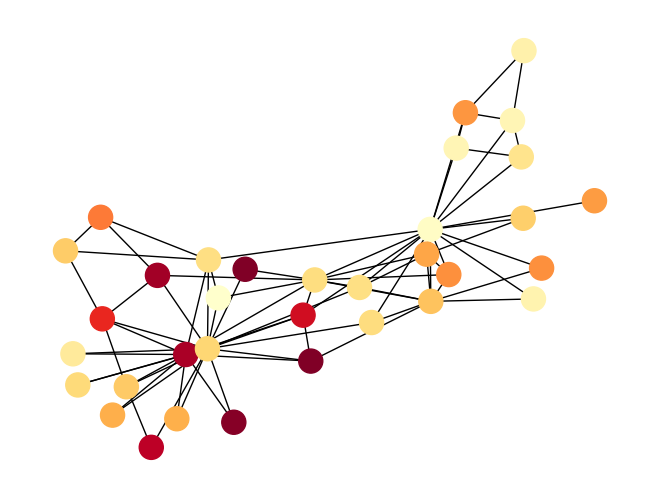

In [26]:
cmap=plt.cm.YlOrRd
# para mas mapas de color ver https://matplotlib.org/stable/gallery/color/colormap_reference.html
nx.draw(grafo, pos=pos,node_color=colors, cmap=cmap)


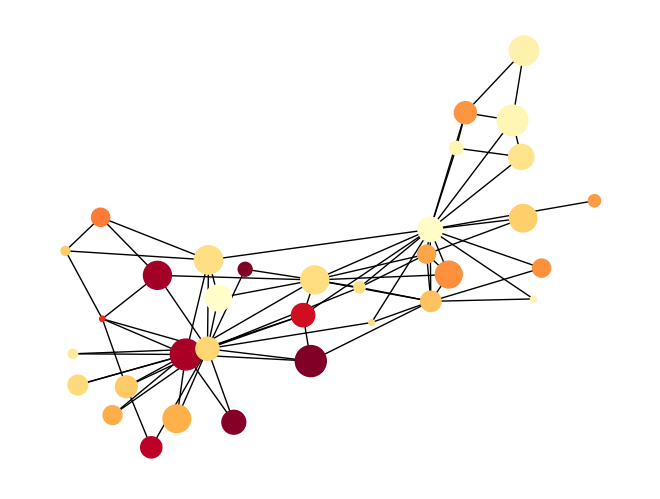

In [27]:
sizes = [random.randrange(1,500,1) for n in grafo.nodes]
nx.draw(grafo, pos=pos,node_color=colors, cmap=cmap, node_size=sizes)

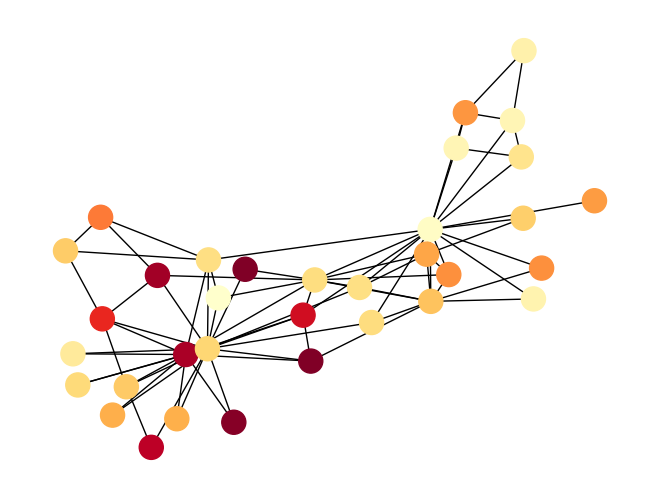

In [28]:
 nx.draw(grafo, pos=pos,node_color=colors, cmap=cmap, width=1)

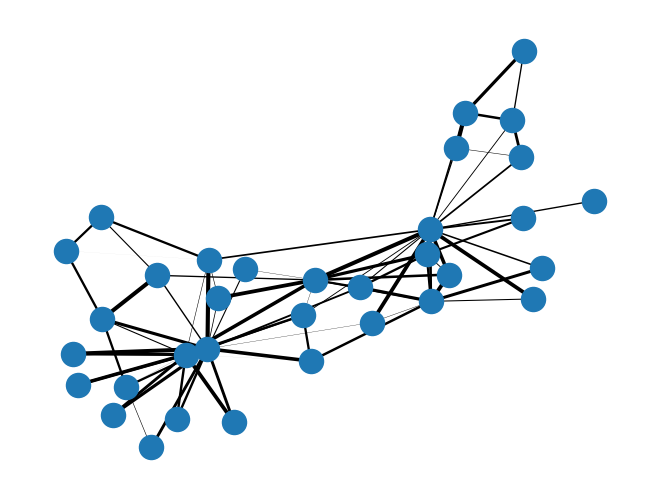

In [29]:
anchos = [random.random()*3 for e in grafo.edges]
nx.draw(grafo, pos=pos, width=anchos)

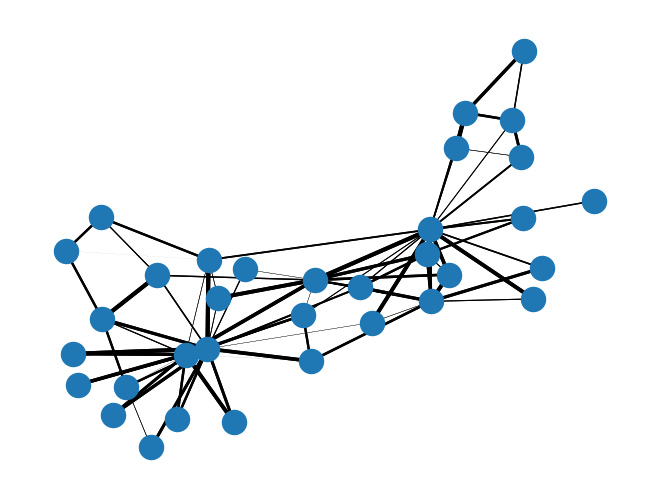

In [30]:
# esto solo funciona para este grafo xq sé que sus nodos tiene etiquetas n0..n33
lista_pares = [n for n in grafo.nodes if int(n[1:]) % 2 == 0]
lista_impares= [n for n in grafo.nodes if int(n[1:]) % 2 == 1]
nx.draw(grafo, pos=pos, width=anchos, nodelist=lista_pares)
nx.draw(grafo, pos=pos, width=anchos, nodelist=lista_impares)

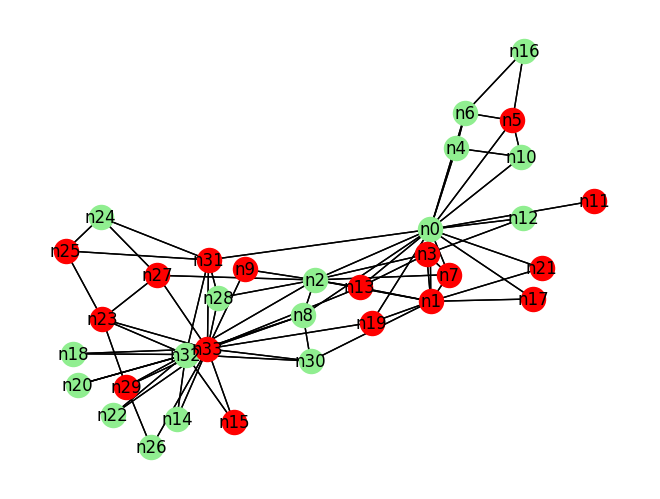

In [31]:
lista_pares = [n for n in grafo.nodes if int(n[1:]) % 2 == 0]
lista_impares= [n for n in grafo.nodes if int(n[1:]) % 2 == 1]
nx.draw(grafo, pos=pos, nodelist=lista_pares, node_color='lightgreen', with_labels=True)
nx.draw(grafo, pos=pos, nodelist=lista_impares, node_color='red')